# Аналіз тексту оглядів

In [1]:
# import the required libraries here
# two lines of code here:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('reviews_filtered.csv')

Згадаймо, який вигляд має сформована нами структура даних типу DataFrame. Перевіримо, чи читається файл reviews_filtered.csv.

In [3]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,fdiNeiN_hoCxCMy2wTRW9g,w31MKYsNFMrjhWxxAb5wIw,eU_713ec6fTGNO4BegRaww,4,0,0,0,I'll be the first to admit that I was not exci...,2013-01-20 13:25:59
1,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4,0,0,0,Wow. So surprised at the one and two star revi...,2016-05-07 01:36:53
2,svK3nBU7Rk8VfGorlrN52A,NJlxGtouq06hhC7sS2ECYw,YvrylyuWgbP90RgMqZQVnQ,5,0,0,0,You can't really find anything wrong with this...,2017-04-07 21:27:49
3,4bUyL7lzoWzDZaJETAKREg,_N7Ndn29bpll_961oPeEfw,y-Iw6dZflNix4BdwIyTNGA,3,0,0,0,Good selection of classes of beers and mains. ...,2014-06-27 21:19:23
4,Amo5gZBvCuPc_tZNpHwtsA,DzZ7piLBF-WsJxqosfJgtA,qx6WhZ42eDKmBchZDax4dQ,5,1,0,0,"Our family LOVES the food here. Quick, friendl...",2017-03-27 01:14:37


## Перший огляд

In [4]:
reviews.loc[0, 'text']

'I\'ll be the first to admit that I was not excited about going to La Tavolta. Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.  Im also not big on ordering pasta when I go out. Alas, I was outnumbered. Thank goodness! I ordered the sea bass special. It was to die for. Cooked perfectly, seasoned perfectly, perfect portion. I can not say enough good things about this dish. When the server asked how it was he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?" She does. \n\nMy hubby got the crab tortellini and also loved his. I heard "mmmm this is so good" from all around the table. Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant. Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversation so it didn\'t seem to bother any

Цей огляд у кращому випадку не є найкращим. З іншого боку, ми можемо побачити, що він говорить про піцу та італійську, що дає деяку впевненість у тому, що ми прийняли гарне рішення поєднати категорії pizza та italian.

## Другий огляд

In [5]:
reviews.loc[1, 'text']

"Wow. So surprised at the one and two star reviews!  We started with the most tender calamari. Although the marinara sauce was a bit bland, but a touch of salt made it just right. My husband had the veal with peppers and said it was so delicious and tender. The mashed potatoes were perfect. I had the salmon Diablo which was also delicious. Our salad was beautiful! Dressing was served on the salad and it was a nice amount. We ended our delicious meal with a piece of tiramisu. Our server Matt was right on!! Very pleasant and knowledgeable about the menu. Our appetizer, salad and entrees were timed perfectly. I love salad and did not mind that my entree was served while I was still eating it! No problem it let my dinner cool to just the right temp for me to eat it comfortably. \nI wonder sometimes if people just don't appreciate relaxing and taking time to eat a wonderful and beautifully prepared meal.  A wonderful atmosphere. So relaxing. The chairs are super comfortable too!!! We will c

## Хороші та погані відгуки
Ми не хочемо читати всі відгуки в нашому наборі даних, щоб знайти хороші та погані. Очевидно, що 5 найкраще і 1 - це найгірше, але як їх згрупувати? Ми встановлюємо поріг посередині чи просто беремо верхній і нижній рейтинги? Давайте спочатку подивимось, як виглядає розподіл рейтингів.

In [6]:
reviews['stars'].describe()

count    594862.000000
mean          3.718837
std           1.403135
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [7]:
star_counts = reviews['stars'].value_counts()

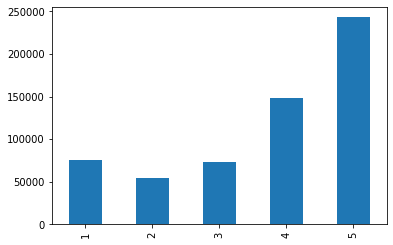

In [8]:
/# task: create a bar plot of number of reviews for each star rating
# hint: sort_index may be useful to get your x-axis in the most intuitive order
star_counts.sort_index().plot(kind='bar')

Цей графік дає корисну наочність. Ми бачимо, що відгуки з трьома зірками або меншими - у нижній частині, а відгуки із п’ятьма зірками - у верхній частині. Ми можемо розглядати п'ять зірок як найкращі категорії, а три зірки і менше як «недобре».

## Візуалізація оглядів
З аналізу розподілу рейтингів зіркових оглядів, нашим першим підходом  для надання відповіді маркетинговій команді буде перегляд найпопулярніших слів у найкращих оглядах та порівняння їх із тими, що існують у найгірших оглядах.

Спочатку давайте окремо витягнемо хороші та погані відгуки.

In [9]:
# task, filter the 'text' column using the 'stars' column to create Series of good and bad review text
# call the results good_review_text and bad_review_text, respectively
# two lines of code here:
good_review_text = reviews[reviews['stars'] == 5]['text'] # тут == 5, бо вище ваказано "розглядати п'ять зірок як найкращі категорії"
bad_review_text = reviews[reviews['stars'] <= 3]['text']

Тепер ми можемо перевірити, скільки у нас рядків, і чи схожі вони на кількість відгуків, які ми очікували від розподілу рейтингів зірок.

In [10]:
good_review_text.shape

(243057,)

In [11]:
bad_review_text.shape

(203707,)

Зараз це насправді багато оглядів. Для наших цілей тут ми почнемо з простого вибору перших 1000 оглядів для кожної групи на основі припущення, що вони упорядковані випадковим чином. Також ми додамо невеликий уточнюючий крок перетворення символів у малі регістри,  щоб не рахувати два рази, наприклад, "Bad" та "bad".

In [12]:
# task: select the first 1000 items in each of the good and bad review text Series and chain the
# str.lower() method to convert characters to lower case. Save the results back in place.
# two lines of code here:
good_review_text = good_review_text[:1000]
bad_review_text = bad_review_text[:1000]

In [13]:
# Check first few good reviews
good_review_text.head()

2     You can't really find anything wrong with this...
4     Our family LOVES the food here. Quick, friendl...
6     their pettuccine was fresh-made in the morning...
9     This place epitomizes the rumored transformati...
14    This place is quite possibly my favorite resta...
Name: text, dtype: object

In [14]:
# check first few bad reviews
bad_review_text.head()

3     Good selection of classes of beers and mains. ...
7     Came here on a Thursday night at 6:30 p.m. My ...
8     Went here last weekend and was pretty disappoi...
11    Th service here is very hit or miss... Sometim...
12    I took my wife out for a Birthday dinner with ...
Name: text, dtype: object

Отже, ми розподілили наші огляди на групи, які ми вважаємо «чудовими» та «поганими». Наша проблема зараз полягає у тому, щоб зрозуміти, у чому полягає різниця між ними. Як ми інтерпретуємо чи візуалізуємо інформацію? Чудовим способом візуального перегляду такої оцінки є ознака того, як часто трапляються певні слова або словосполучення. Хороший вступ до створення wordclouds є [тут] (https://www.datacamp.com/community/tutorials/wordcloud-python) у статті спільноти DataCamp. Очевидно, що необхідно встановити відповідну бібліотеку для того, щоб подальша робота була можливою.

In [15]:
# task: import WordCloud and STOPWORDS here
# one line of code here
from wordcloud import WordCloud, STOPWORDS

Спочатку нам потрібно зібрати огляди в єдину структуру для кожного хорошого та поганого відгуків для wordcloud.

In [16]:
# task: combine all the good and bad review text into a single string for each
# two lines of code here
good_text = good_review_text.str.cat()
bad_text = bad_review_text.str.cat()

### Wordcloud з хороших слів

Тепер, нарешті, ми можемо створити wordcloud! Давайте розглянемо топ-50 слів з найкращих відгуків.

In [17]:
# task: generate a wordcloud of good review words, max 50 words
# one line of code here, call the result good_wordcloud
good_wordcloud = WordCloud(max_words=50).generate(good_text)

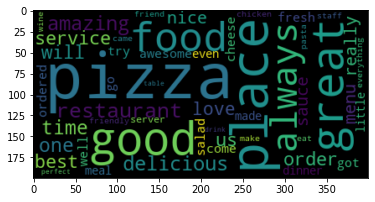

In [18]:
plt.imshow(good_wordcloud, interpolation='bilinear')

Для маркетологів це зображення має велику цінність. Воно виглядає розумно. Багато хто із маркетингу буде зацікавлений прийняти це зображення таким, яким воно є, і використовувати його. 

In [19]:
# task: use the to_file method for wordcloud to save the above image to send to marketing
# one line of code here
good_wordcloud.to_file("good_wordcloud.png")

###  Wordcloud з поганих слів

Спробуємо дізнатися щось додаткове, переглянувши найкращі слова в поганих відгуках.

In [20]:
# task: generate a wordcloud of bad review words, max 50 words
# one line of code here, call the result bad_wordcloud
bad_wordcloud = WordCloud(max_words=50).generate(bad_text)

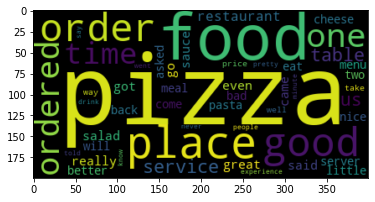

In [21]:
plt.imshow(bad_wordcloud, interpolation='bilinear')

Тут ми помічаємо деякі речі. По-перше, "піца" - це дуже помітне слово, але це було і в найкращих відгуках. Це дуже очевидно відповідне слово для нашої цільової категорії, але чи корисне воно для розділення хороших та поганих відгуків? Напевно, ні. Ми також можемо почати робити цікаві зауваження, що тут, здається, є більш "нудні" слова, такі як "told", "said", "came" та "went". Між нашими двома словосполуками явно різний тон. Тут ми безумовно досягли чогось корисного.

# Підсумок
Ми багато чого досягли за час виконання даного завдання. Перш за все ми пов’язали бізнес-проблему з набором даних та визначили, які саме дані нам потрібні. Далі ми ознайомилися з цими даними, щоб відповісти на важливе запитання: яка категорія продуктів харчування має цікавити наш бізнес. Тоді ми використали отримані знання, щоб витягти лише відповідні огляди з великого файлу, які в іншому випадку були б занадто великими для обробки. Ми також розділили окремі найкращі та найгірші відгуки, щоб подивитися на них окремо і чітко помітили, що між ними є різниця.

Отже, ми отримали корисний результат, але ми можемо зробити більше. Подальша обробка уточнює ту маркетингову інформацію, яку ми вже отримали.

# Покращення набору слів wordcloud

Ми помітили, що деякі слова, які мають часте використання в поганих оглядах, також наявні в  хороших оглядах. Потрібно виключити їх із wordcloud, вказавши їх як стоп-слова. Додамо їх до списку стоп-слів за замовчуванням STOPWORDS.

In [22]:
bad_stopwords = set(['pizza', 'food', 'order', 'place'])

In [23]:
# task: create a set of stopwords and add the "bad" ones above to it
# two lines of code here:
stopwords = set(STOPWORDS)
stopwords.update(bad_stopwords)

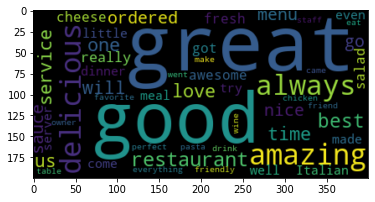

In [24]:
# task: generate a better wordcloud of good review words, max 50 words
# one line of code here, call the result better_wordcloud
better_wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(good_text)
plt.imshow(better_wordcloud, interpolation='bilinear')

Ми бачимо, що склад слів змінився. Тепер ми маємо слова, які зустрічаються тільки в позитивних оглядах і не маємо спільних слів. Який wordcloud використовувати - це справа ваших маркетологів.

# Післямова
Використання одиничних слів - це хороший початок, але слова, що виникають у послідовностях і самі послідовності можуть мати важливе значення. Розглядаючи хороші і погані огляди та аналізуючи лише окремі слова, ми втратимо, наприклад, словосполучення «highly recommended». Для підвищення точності оцінки необхідно використовувати словосполучення з двох, трьох і більше слів.